# Compte rendu du mini projet n°4 : Le pendule

### Introduction
Dans ce mini projet, nous cherchons l'expression explicite de l'angle que fait un pendule avec l'axe de sa position d'equilibre (la verticale) sous differentes hypotheses a chaque fois.

In [4]:
# importation des modules
import numpy as np
import matplotlib.pyplot as plt

### Approximation des petits angles
Dans un premier temps, nous allons faire l'hypothese que les angles (qu'on note $θ$) sont petits pour simplifier l'equation differentielle que nous devons resoudre. 

Resolution avec la méthode RK4 :

In [19]:
def derivee2(f,fp,q):  # 'q' etant la valeur de l’amortissement
    return (-q)*fp-f

def RungeKutta4(start, end, step, val_ini,val_ini_p, derivee,q):    # 'val_ini_p'  valeur initiale de la derivee ( 'p' pour 'prime')
                                                                    # q la valeur de l’amortissement
    
    # Création du tableau des x
    interval = end - start                     # Intervalle
    num_points = int(interval / step) + 1      # Nombre d'éléments
    t = np.linspace(start, end, num_points)    # valeurs de t
    v = [val_ini]
    vp=[val_ini_p]   #la derivee
    
    for i in range(num_points-1):
        d1=derivee(v[i] ,vp[i],q)
        d1p=derivee(v[i] ,vp[i],q)
        
        d2=derivee(vp[i]+d1*step/2 , v[i] +vp[i]*step/2 ,q)
        
        
        d3=derivee(vp[i]+d2*step/2 , v[i]+vp[i]*step/2 + d1*(step**2)/4 ,q)
        
        
        d4=derivee(vp[i]+d3*step , v[i]+vp[i]*step + d2*step**2/2 ,q)
        
        vp.append(vp[i] + (step/6)*(d1+2*d2+2*d3+d4))
        v.append(v[i] + step*vp[i] +(step/6)*(d1+d1+d3) )  # DL
        
    return t, v

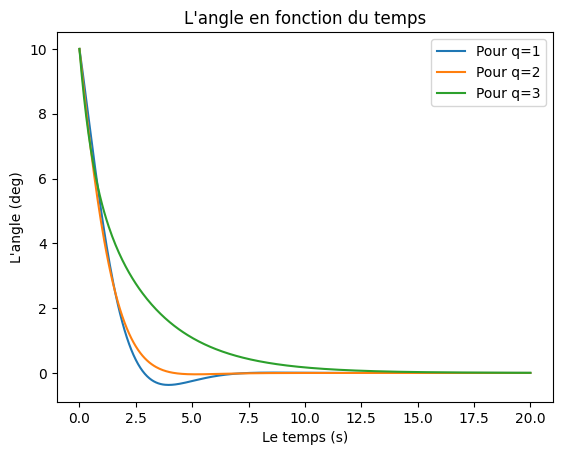

In [38]:
t,theta1 = RungeKutta4(0, 20, 0.05, 10,0, derivees,1)
t,theta2 = RungeKutta4(0, 20, 0.05, 10,0, derivees,2)
t,theta3 = RungeKutta4(0, 20, 0.05, 10,0, derivees,3)

plt.plot(t,theta1,label='Pour q=1')
plt.plot(t,theta2,label='Pour q=2')
plt.plot(t,theta3,label='Pour q=3')
plt.xlabel('Le temps (s)')
plt.ylabel("L'angle (deg)")
plt.title("L'angle en fonction du temps")
plt.legend()
plt.show()

### Force d’excitation

In [ ]:
def derivees(f,fp,t,q):  # 'q' etant la valeur de l’amortissement
    return (-q)*fp-f + np.sin(2*t/3)

def RungeKutta4(start, end, step, val_ini,val_ini_p, derivee,q):    # 'val_ini_p'  valeur initiale de la derivee ( 'p' pour 'prime')
                                                                    # q la valeur de l’amortissement
    
    # Création du tableau des x
    interval = end - start                     # Intervalle
    num_points = int(interval / step) + 1      # Nombre d'éléments
    t = np.linspace(start, end, num_points)    # valeurs de t
    v = [val_ini]
    vp=[val_ini_p]   #la derivee
    
    for i in range(num_points-1):
        d1=derivee(v[i] ,vp[i],q)
        d2=derivee(vp[i]+d1*step/2 , v[i] +vp[i]*step/2 ,q)
        d3=derivee(vp[i]+d2*step/2 , v[i]+vp[i]*step/2 + d1*(step**2)/4 ,q)
        d4=derivee(vp[i]+d3*step , v[i]+vp[i]*step + d2*step**2/2 ,q)
        
        vp.append(vp[i] + (step/6)*(d1+2*d2+2*d3+d4))
        v.append(v[i] + step*vp[i] +(step/6)*(d1+d1+d3) )  # DL
        
    return t, v